In [1]:
!ls

3.7-predicting-house-prices.ipynb
DLwP 3.3.ipynb
input
lost+found
PD_fast_feature_extraction_wo_data_augmentation.ipynb
PD_feature_extraction_w_data_augmentation.ipynb
plant_dataset_02.zip


In [9]:
#!rm -rf input

In [3]:
#!unzip plant_dataset_02.zip

In [2]:
!ls input

test  train  validation


In [3]:
from keras import models
from keras import layers

from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.


In [42]:
input_shape = (300, 300, 3)
target_size = (300, 300)

In [41]:
conv_base = ResNet50(weights='imagenet', input_shape=input_shape, include_top=False)

In [46]:
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
Total params: 49,278,851
Trainable params: 49,225,731
Non-trainable params: 53,120
_________________________________________________________________


In [47]:
print('This is the number of trainable weights ',
     'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights  before freezing the conv base: 216


In [48]:
conv_base.trainable = False

In [49]:
print('This is the number of trainable weights ',
     'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights  after freezing the conv base: 4


In [43]:
# make data generators
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'input/train',
    target_size=target_size,
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    'input/validation',
    target_size=target_size,
    batch_size=20,
    class_mode='categorical')

Found 1826 images belonging to 3 classes.
Found 596 images belonging to 3 classes.


In [50]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [51]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    verbose=2,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/5


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


 - 100s - loss: 1.0395 - acc: 0.6679 - val_loss: 4.6732 - val_acc: 0.3343
Epoch 2/5
 - 93s - loss: 0.6269 - acc: 0.7490 - val_loss: 6.2573 - val_acc: 0.3313
Epoch 3/5
 - 94s - loss: 0.5495 - acc: 0.7692 - val_loss: 6.9606 - val_acc: 0.3394
Epoch 4/5
 - 92s - loss: 0.5564 - acc: 0.7833 - val_loss: 7.8633 - val_acc: 0.3313
Epoch 5/5
 - 90s - loss: 0.4779 - acc: 0.8138 - val_loss: 7.8169 - val_acc: 0.3313


In [39]:
# s 8:45 e 9:15
# s 9:20 e 

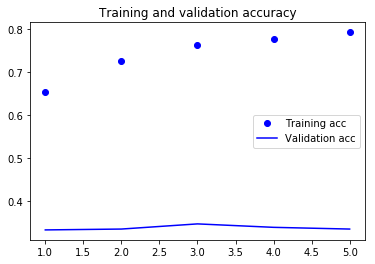

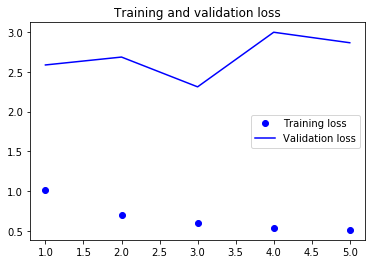

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()